In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA, TruncatedSVD, NMF
from sklearn.model_selection import train_test_split

In [2]:
books_df = pd.read_csv('books_clean.csv')

In [3]:
books_df.head()

,Unnamed: 0,text_reviews_count,average_rating,num_pages,publication_year,ratings_count,"history, historical fiction, biography",fiction,"fantasy, paranormal","mystery, thriller, crime",poetry,romance,non-fiction,children,young-adult,"comics, graphic"
0,5333265,1,4.00,256,1984,3,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0
1,1333909,6,3.23,256,2001,10,0.022321,0.977679,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0
2,7327624,7,4.03,600,1987,140,0.000000,0.195122,0.756098,0.024390,0.02439,0.000000,0.0,0.0,0.0,0.0
3,6066819,3282,3.49,368,2009,51184,0.000000,0.943878,0.000000,0.017007,0.00000,0.039116,0.0,0.0,0.0,0.0
4,287140,5,3.40,256,2011,15,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.0,0.0,0.0,0.0


In [4]:
books_df = books_df.rename(columns={'Unnamed: 0': 'book_id'}).set_index('book_id')

In [5]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, Normalizer

# Impute missing values
imputer = SimpleImputer(strategy='mean')
imputed_df = imputer.fit_transform(books_df)

# Normalize the data
normalizer = Normalizer()
normalized_df = normalizer.fit_transform(imputed_df)

# Optionally, you can scale the data after normalization
scaler = StandardScaler()
scaled_df = scaler.fit_transform(normalized_df)

In [6]:
pca = PCA(random_state=101).fit(scaled_df)

In [7]:
pca.explained_variance_ratio_

array([0.18027877, 0.10122735, 0.09249903, 0.08151865, 0.07651518,
       0.07366484, 0.06909243, 0.06802499, 0.06283359, 0.05979209,
       0.05776707, 0.04439469, 0.02559778, 0.00566206, 0.00113148])

In [8]:
pc_df = pd.DataFrame(pca.components_)
pc_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.501426,0.297374,0.099261,0.544929,-0.578544,0.073911,0.069386,0.017749,0.019617,0.031908,-0.012383,0.064431,0.045125,-0.010786,0.013229
1,0.051786,0.207676,0.026544,0.010836,0.015391,-0.406011,0.387871,0.352255,0.159828,-0.028818,0.199344,-0.610195,0.089336,0.258752,-0.019283
2,-0.039596,-0.018183,-0.602162,0.083956,-0.028384,-0.307842,-0.318803,0.029911,-0.242015,0.195402,0.058011,0.028545,0.485519,0.084757,0.294118
3,0.036990,0.145668,-0.180409,-0.059759,0.060150,0.031954,0.479861,-0.380561,0.281504,0.137197,-0.537353,-0.048320,0.342800,-0.233976,0.012476
4,0.110976,0.301820,0.100622,-0.081311,0.073991,0.257379,0.156849,0.292415,-0.560611,-0.081849,-0.234666,0.174960,0.325614,0.289254,-0.318859


In [9]:
features = books_df.iloc[:, 1:].values  # Exclude book_id

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=10, random_state=101)  # Choose the number of components
book_embeddings = pca.fit_transform(scaled_features)

In [12]:
# import pandas as pd
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics.pairwise import cosine_similarity


# # Calculate cosine similarity matrix
# similarity_matrix = cosine_similarity(book_embeddings)

C:\Users\gnana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\gnana\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\gnana\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\gnana\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^

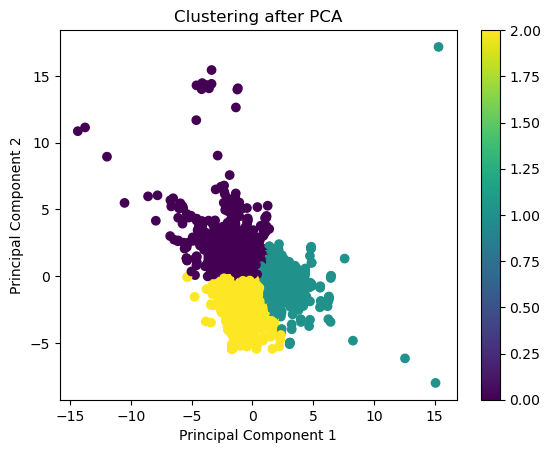

In [11]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)  # Use scaled_features from previous steps

# Cluster the transformed data
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(principal_components)


plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering after PCA')
plt.colorbar()
plt.show()

In [13]:
# 1. Examine feature importance in principal components
print("Principal Component 1 - Feature Importance:")
print(pca.components_[0])  # Feature coefficients for PC1
print("\nPrincipal Component 2 - Feature Importance:")
print(pca.components_[1])  # Feature coefficients for PC2

# 2. Inverse transform cluster centroids to original feature space
cluster_centers_original = pca.inverse_transform(kmeans.cluster_centers_)

# Print the feature values associated with each cluster centroid
print("\nCluster Centroids - Original Feature Values:")
print(cluster_centers_original)


Principal Component 1 - Feature Importance:
[ 0.05839598  0.00822045 -0.01111261 -0.03262463  0.44527379 -0.38493722
 -0.32334344 -0.1674365   0.04882699 -0.18316276  0.64323563 -0.0367129
 -0.25531061  0.00932802]

Principal Component 2 - Feature Importance:
[ 0.38584929 -0.00339994  0.04132157  0.02227666 -0.19228758 -0.58266282
  0.36685097 -0.30753796  0.08281454  0.36952229  0.05933926  0.10747764
  0.25372074  0.14291103]

Cluster Centroids - Original Feature Values:
[[ 0.36674437 -0.00893787  0.05062041  0.04468861 -0.49265924 -0.35995357
   0.59618521 -0.21333577  0.0550048   0.50741332 -0.35793512  0.1367653
   0.43302816  0.14387056]
 [ 0.10900102  0.01543911 -0.02093136 -0.06128785  0.83629678 -0.72174302
  -0.60766545 -0.31384826  0.09153415 -0.34448725  1.20754688 -0.06910351
  -0.47975094  0.01727785]
 [-0.52962035 -0.00135907 -0.04473814 -0.0057452  -0.06331287  1.00448514
  -0.24218303  0.50552735 -0.13870914 -0.34227469 -0.51899145 -0.11097718
  -0.14564334 -0.18767536

In [15]:
# Get cluster assignments for each data point
cluster_assignments = kmeans.labels_

# Print the cluster assignments
print("Cluster Assignments:")
print(cluster_assignments)
import numpy as np

# Get indices of data points belonging to each cluster
cluster_indices = [np.where(cluster_assignments == i)[0] for i in range(kmeans.n_clusters)]

# Print indices of data points belonging to each cluster
for i, indices in enumerate(cluster_indices):
    print(f"Data points belonging to Cluster {i}:")
    print(indices)


Cluster Assignments:
[1 2 0 ... 0 0 0]
Data points belonging to Cluster 0:
[      2       7       8 ... 1941975 1941976 1941977]
Data points belonging to Cluster 1:
[      0       4       5 ... 1941964 1941969 1941973]
Data points belonging to Cluster 2:
[      1       3       6 ... 1941971 1941972 1941974]
